<a href="https://colab.research.google.com/github/Vakhranev/MDB/blob/main/voc%20%D0%B8%20hd%20%D0%B4%D0%BB%D1%8F%20%D1%82%D0%BE%D0%BA%D0%B5%D0%BD%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


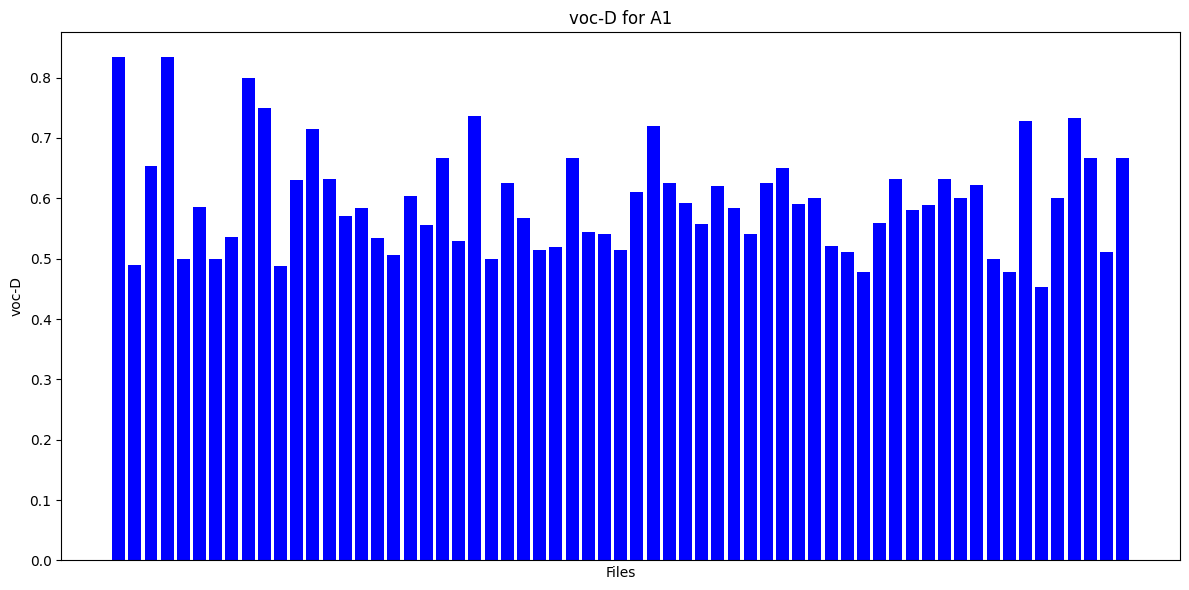

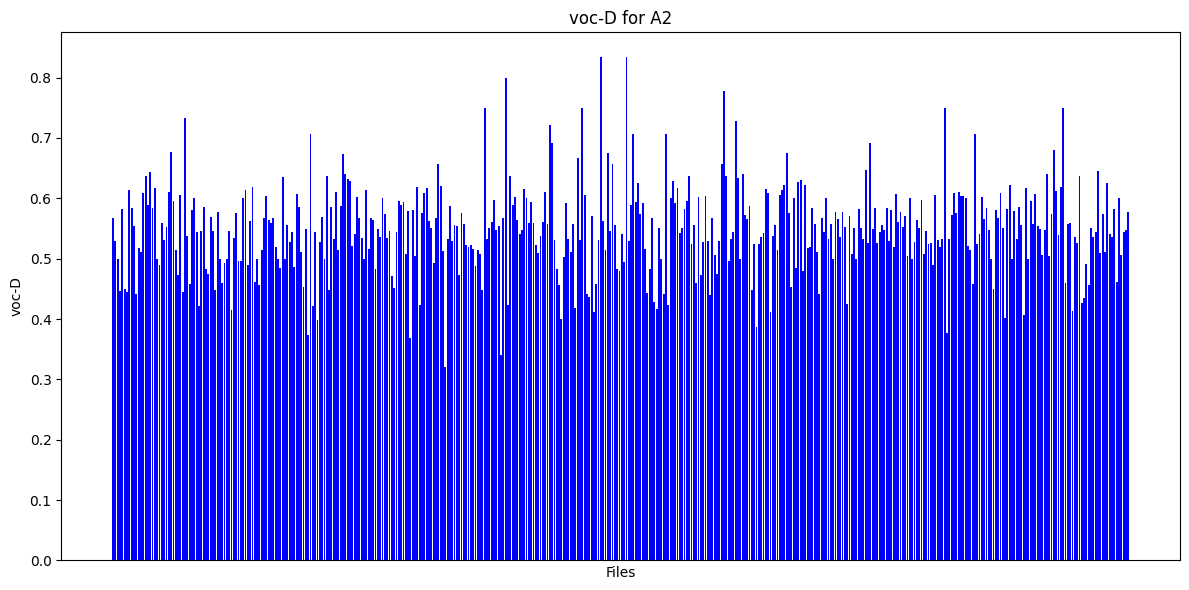

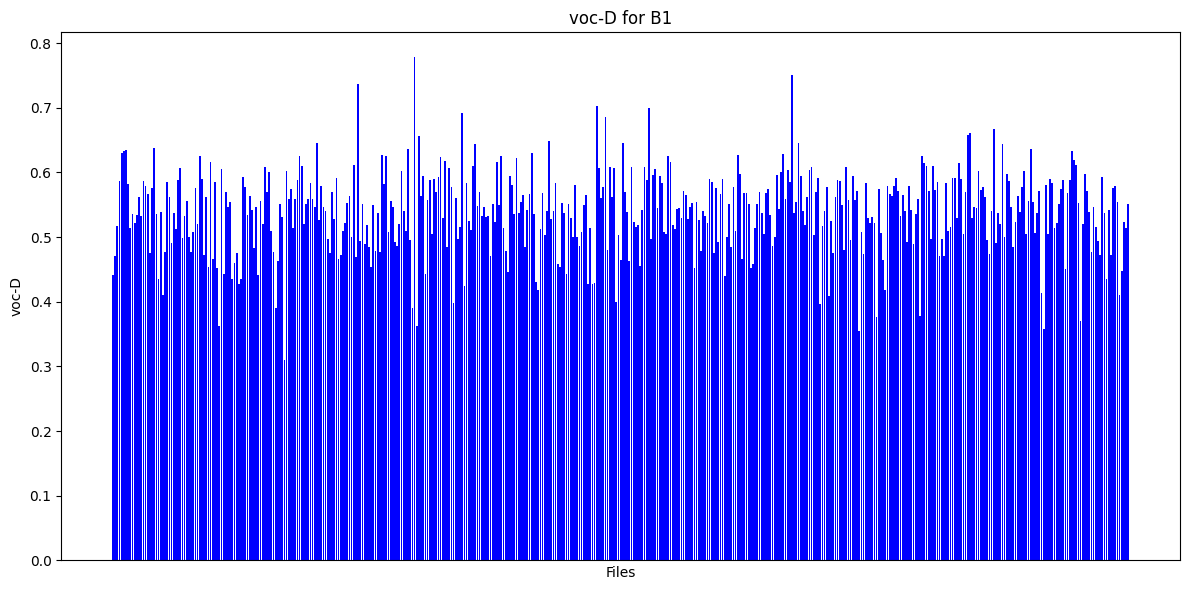

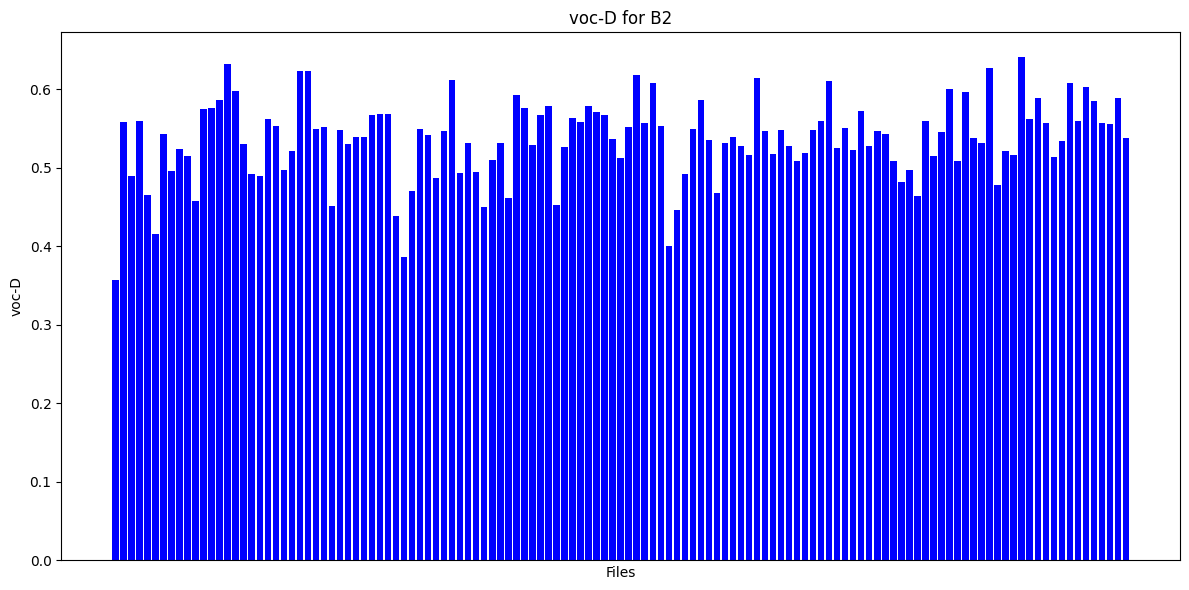

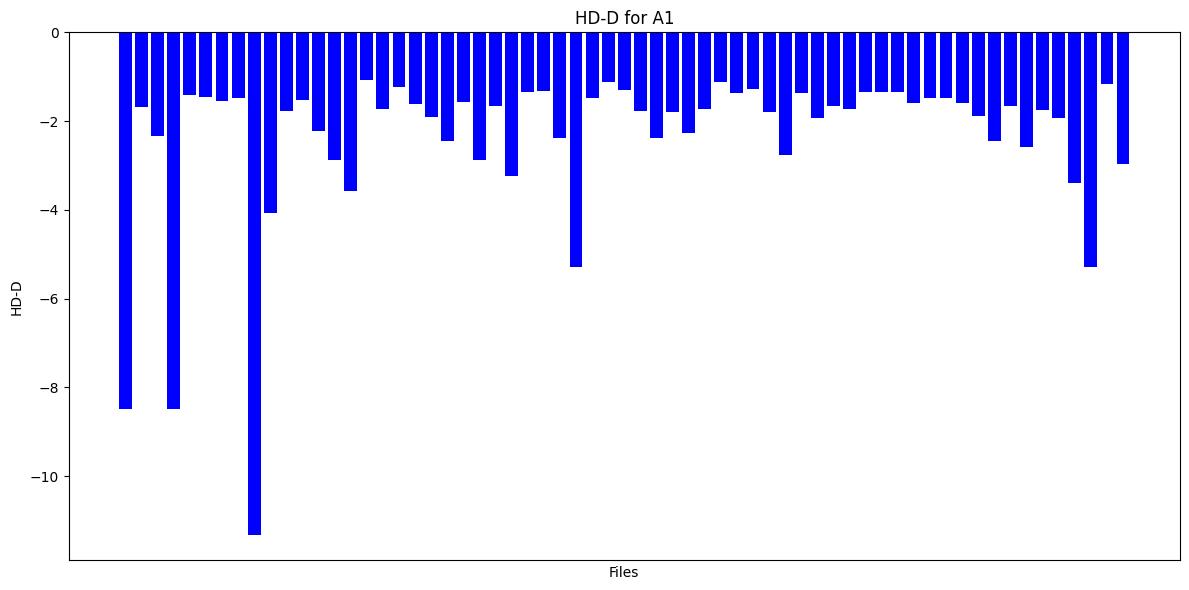

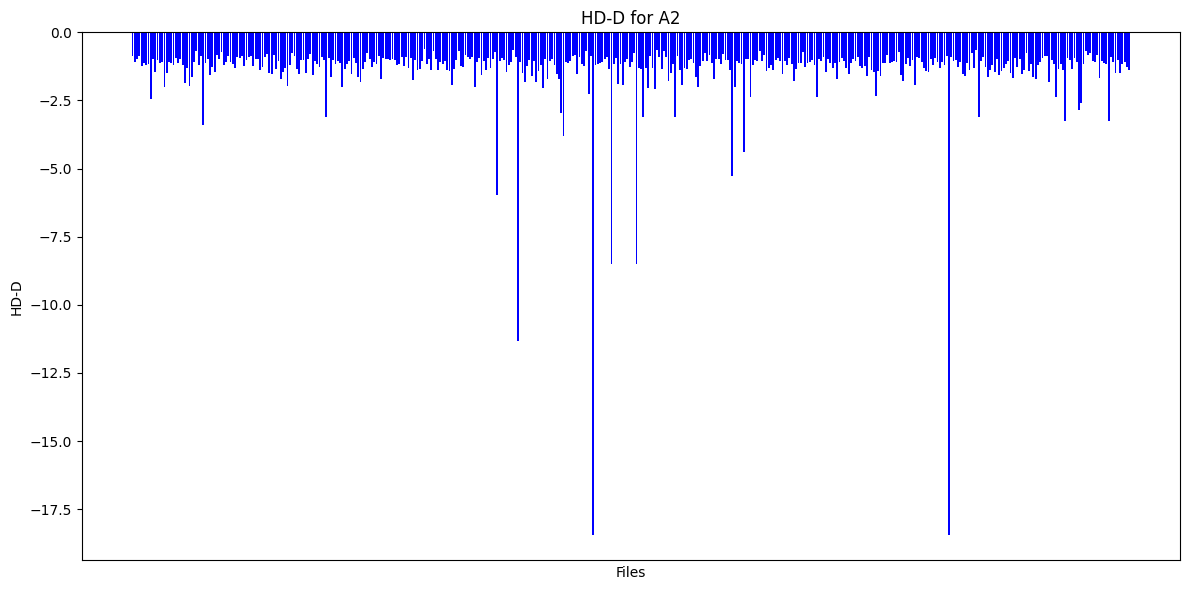

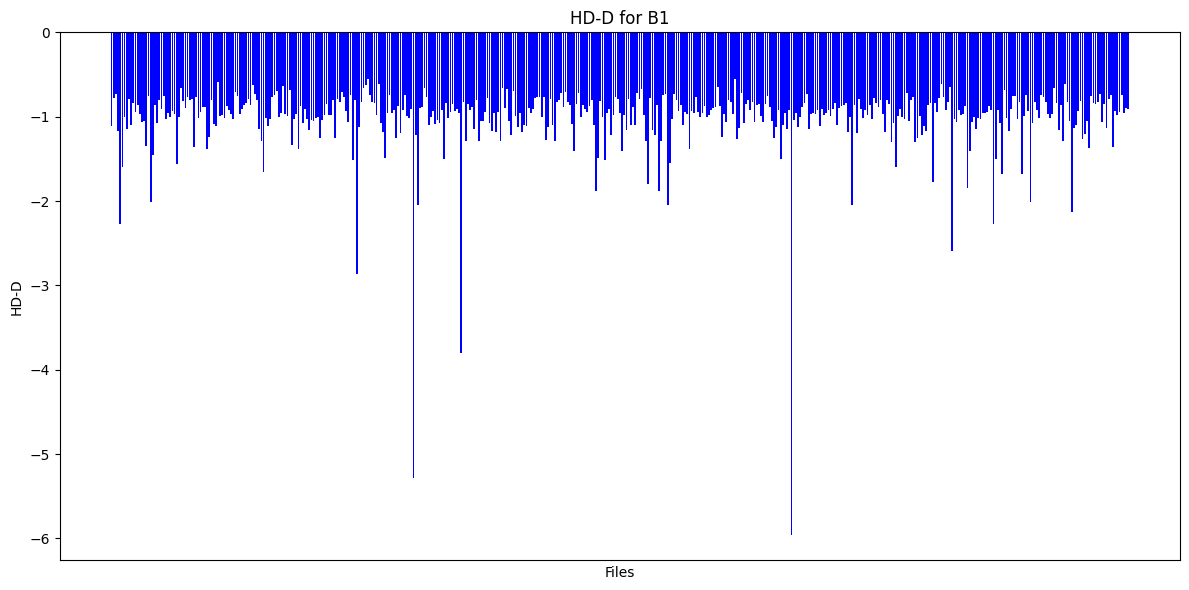

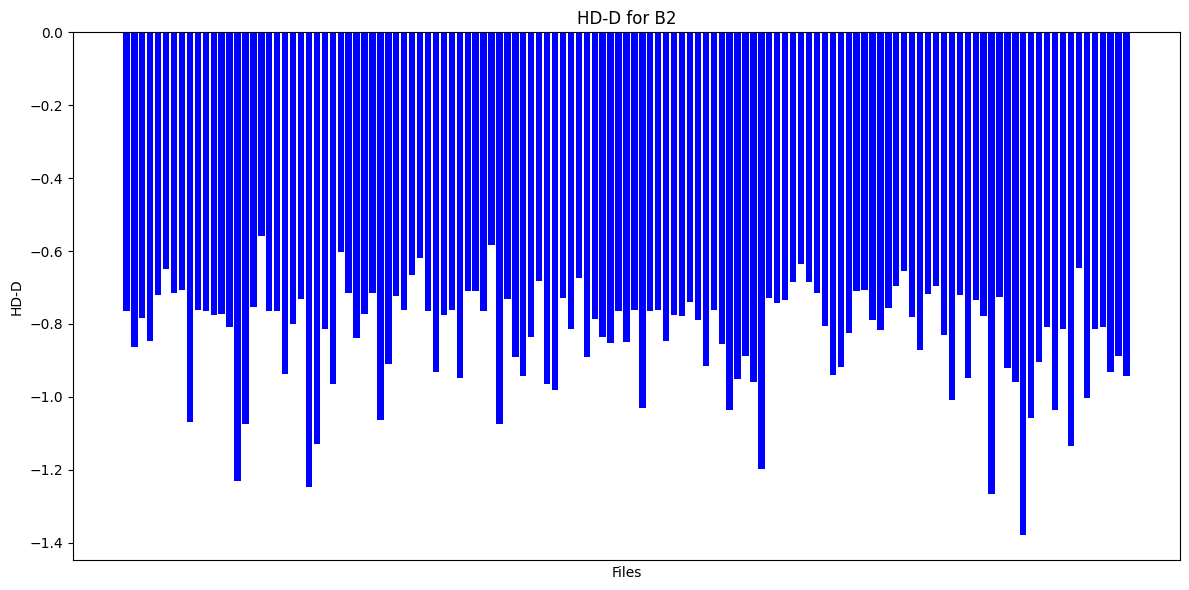

CEFR Level: A1, Avg voc-D: 0.5969
CEFR Level: A2, Avg voc-D: 0.5498
CEFR Level: B1, Avg voc-D: 0.5402
CEFR Level: B2, Avg voc-D: 0.5365
CEFR Level: A1, Avg HD-D: -2.3485
CEFR Level: A2, Avg HD-D: -1.4097
CEFR Level: B1, Avg HD-D: -1.0302
CEFR Level: B2, Avg HD-D: -0.8338


In [25]:
import os
import math
import re
import nltk
nltk.download('punkt')
from nltk import word_tokenize
import matplotlib.pyplot as plt
from collections import Counter
from math import comb

class MetricsCalculator:
    def __init__(self, threshold=0.8):
        self.threshold = threshold
        self.ttr_data = {}
        self.mtld_data = {}
        self.vocd_data = {}
        self.hd_data = {}

    def preprocess_text(self, text):
        text = re.sub(r'<.*?>', '', text)
        text = re.sub(r'\[unclear\]', '', text)
        return text

    def calculate_ttr(self, tokens):
        total_tokens = len(tokens)
        unique_tokens = len(set(tokens))
        ttr = unique_tokens / total_tokens
        return ttr

    def calculate_vocd_d(self, tokens):
        word_count = len(tokens)
        unique_words = set(tokens)
        unique_word_count = len(unique_words)

        freq_dict = Counter(tokens)
        freq_values = list(freq_dict.values())

        freq_sum = sum(freq_values)
        sorted_freqs = sorted(freq_values, reverse=True)

        cumulative_freq = 0
        vocd_d = None

        for idx, freq in enumerate(sorted_freqs):
            cumulative_freq += freq
            if cumulative_freq / freq_sum >= self.threshold:
                vocd_d = (idx + 1) / unique_word_count
                break

        return vocd_d

    def calculate_hd_d(self, tokens):
        unique_word_count = len(set(tokens))

        # Set your desired vocabulary size
        vocab_size = 5000  # You can change this as needed

        if unique_word_count <= 1:
            return 0.0  # To avoid division by zero or negative log values

        hd_d = (math.log(unique_word_count) - math.log(vocab_size)) / (math.log(unique_word_count) - 1)

        return hd_d

    def process_files(self, directory):
        cefr_levels = ['A1', 'A2', 'B1', 'B2']

        for cefr_level in cefr_levels:
            cefr_dir = os.path.join(directory, cefr_level)
            if os.path.isdir(cefr_dir):
                ttr_values = []
                vocd_values = []
                hd_values = []
                for filename in os.listdir(cefr_dir):
                    if filename.endswith(".txt"):
                        filepath = os.path.join(cefr_dir, filename)
                        with open(filepath, "r", encoding="utf-8") as file:
                            text = file.read()
                            preprocessed_text = self.preprocess_text(text)
                            tokens = word_tokenize(preprocessed_text)
                            ttr = self.calculate_ttr(tokens)
                            vocd = self.calculate_vocd_d(tokens)
                            hd = self.calculate_hd_d(tokens)
                            ttr_values.append(ttr)
                            vocd_values.append(vocd)
                            hd_values.append(hd)
                if ttr_values:
                    self.ttr_data[cefr_level] = ttr_values
                if vocd_values:
                    self.vocd_data[cefr_level] = vocd_values
                if hd_values:
                    self.hd_data[cefr_level] = hd_values

    def plot_metric(self, metric_data, title):
        for cefr_level, values in metric_data.items():
            plt.figure(figsize=(12, 6))
            plt.bar(range(len(values)), values, color='b')
            plt.xticks([])
            plt.xlabel('Files')
            plt.ylabel(title)
            plt.title(f'{title} for {cefr_level}')
            plt.tight_layout()
            plt.show()

    def calculate_avg_metrics(self):
        avg_vocd = {}
        avg_hd = {}

        for cefr_level, vocd_values in self.vocd_data.items():
            avg_vocd[cefr_level] = sum(vocd_values) / len(vocd_values)

        for cefr_level, hd_values in self.hd_data.items():
            avg_hd[cefr_level] = sum(hd_values) / len(hd_values)

        return avg_vocd, avg_hd

if __name__ == "__main__":
    directory_path = "/content/Students_texts"
    metrics_calculator = MetricsCalculator(threshold=0.72)  # Передаем пороговое значение threshold
    metrics_calculator.process_files(directory_path)

    metrics_calculator.plot_metric(metrics_calculator.vocd_data, 'voc-D')
    metrics_calculator.plot_metric(metrics_calculator.hd_data, 'HD-D')

    avg_vocd, avg_hd = metrics_calculator.calculate_avg_metrics()

    for cefr_level, avg in avg_vocd.items():
        print(f"CEFR Level: {cefr_level}, Avg voc-D: {avg:.4f}")

    for cefr_level, avg in avg_hd.items():
        print(f"CEFR Level: {cefr_level}, Avg HD-D: {avg:.4f}")